<a href="https://colab.research.google.com/github/Linaeid/Linaeid/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install pyxlsb


In [ ]:

import pandas as pd
import pyxlsb
import numpy as np

In [ ]:
dataframe = pd.read_excel("stcT3.xlsb",index_col=0)


In [ ]:
dataframe.head()

,user_id_maped,program_name,rating,date_,program_genre
0,26138,100 treets,1,42882,Drama
1,7946,Moana,1,42876,Animation
2,7418,The Mermaid Princess,1,42957,Animation
3,19307,The Mermaid Princess,2,42942,Animation
4,15860,Churchill,2,42923,Biography


In [ ]:
dataframe.describe()

,user_id_maped,rating,date_
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.709266e+04,2.497283e+00,4.301202e+04
std,1.003513e+04,1.119837e+00,1.242834e+02
min,1.000000e+00,1.000000e+00,4.280800e+04
25%,8.253000e+03,1.000000e+00,4.289600e+04
50%,1.714900e+04,2.000000e+00,4.302200e+04
75%,2.566500e+04,3.000000e+00,4.312100e+04
max,3.428000e+04,4.000000e+00,4.322000e+04


In [ ]:
dataframe.isnull().any()

user_id_maped    False
program_name     False
rating           False
date_            False
program_genre    False
dtype: bool

In [ ]:
!pip install scikit-surprise


Computing the msd similarity matrix...
Done computing similarity matrix.
Top 5 Program Recommendations for User your_user_id
Teen Wolf     Werewolves Of London (Predicted Rating: 2.497395274539256 )
Killer Kids  A cream & Banana plit (Predicted Rating: 2.497395274539256 )
Criminal Minds     ...A Thousand Words (Predicted Rating: 2.497395274539256 )
Grey's Anatomy     Holidaze (Predicted Rating: 2.497395274539256 )
House of Lies     Til Death Do Us Part (Predicted Rating: 2.497395274539256 )


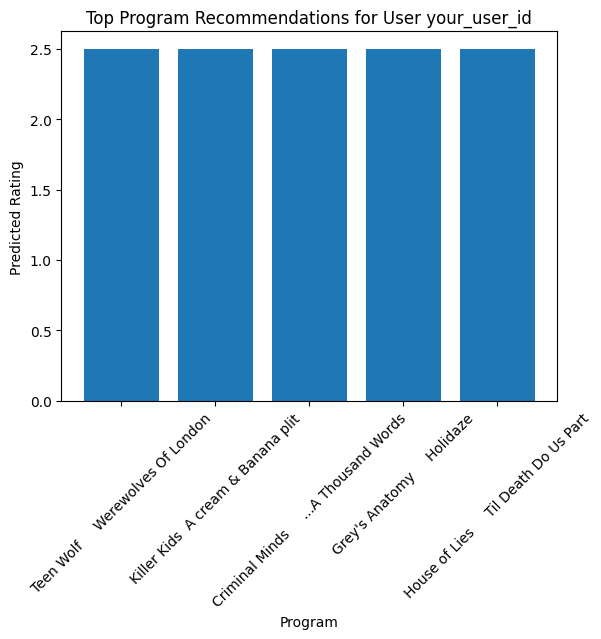

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


data = pd.read_excel("stcT3.xlsb")

# Define the reader object
reader = Reader(rating_scale=(1, 5))

# Load the dataset into Surprise
dataset = Dataset.load_from_df(data[['user_id_maped', 'program_name', 'rating']], reader)

# Split the dataset into training and testing
trainset, testset = train_test_split(dataset, test_size=0.2)

# Build the item-based collaborative filtering model
model = KNNBasic(sim_options={'user_based': False})  # Item-based filtering

# Train the model
model.fit(trainset)

# Get the top-N program recommendations for a user
user_id = 'your_user_id'  # Replace with the actual user ID
top_n = 5  # Number of recommendations to generate
user_programs = data[data['user_id_maped'] == user_id]['program_name'].unique()
user_unrated_programs = list(set(data['program_name'].unique()) - set(user_programs))

recommendations = []
for program in user_unrated_programs:
    predicted_rating = model.predict(user_id, program).est
    recommendations.append((program, predicted_rating))

# Sort the recommendations by predicted rating in descending order
recommendations.sort(key=lambda x: x[1], reverse=True)

# Get the top-N recommended programs
top_recommendations = recommendations[:top_n]

# Print the top-N recommendations
print("Top", top_n, "Program Recommendations for User", user_id)
for program, rating in top_recommendations:
    print(program, "(Predicted Rating:", rating, ")")

# Visualize the recommendations using matplotlib
program_names = [program for program, _ in top_recommendations]
predicted_ratings = [rating for _, rating in top_recommendations]

plt.bar(program_names, predicted_ratings)
plt.xlabel('Program')
plt.ylabel('Predicted Rating')
plt.title('Top Program Recommendations for User {}'.format(user_id))
plt.xticks(rotation=45)
plt.show()

# Visualize the recommendations using plotly
fig = go.Figure(data=[go.Bar(x=program_names, y=predicted_ratings)])
fig.update_layout(
    title='Top Program Recommendations for User {}'.format(user_id),
    xaxis_title='Program',
    yaxis_title='Predicted Rating'
)
fig.show()



In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_excel("stcT3.xlsb")

# Define the reader object
reader = Reader(rating_scale=(1, 5))

# Load the dataset into Surprise
dataset = Dataset.load_from_df(data[['user_id_maped', 'program_name', 'rating']], reader)

# Build the item-based collaborative filtering model
model = KNNBasic(sim_options={'user_based': False})  # Item-based filtering

# Train the model
trainset = dataset.build_full_trainset()
model.fit(trainset)

# Get the top-N program recommendations for "Moana" movie viewers
movie_name = "Moana"
movie_users = data[data['program_name'] == movie_name]['user_id_maped'].unique()
recommendations = []

for user_id in movie_users:
    user_unrated_programs = list(set(data['program_name'].unique()) - set(data[data['user_id_maped'] == user_id]['program_name'].unique()))

    for program in user_unrated_programs:
        predicted_rating = model.predict(user_id, program).est
        recommendations.append((program, predicted_rating))

# Sort the recommendations by predicted rating in descending order
recommendations.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 recommended programs
top_recommendations = recommendations[:5]

# Plot the recommendations as a bar plot
program_names = [program for program, _ in top_recommendations]
predicted_ratings = [rating for _, rating in top_recommendations]

plt.bar(program_names, predicted_ratings)
plt.xlabel('Program')
plt.ylabel('Predicted Rating')
plt.title('Top 5 Program Recommendations for People who Watched "Moana"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Computing the msd similarity matrix...
Done computing similarity matrix.
